# Ejercicio de Exploración de Datos con Pandas

En este notebook vamos a practicar **exploración de datos** utilizando Pandas, Matplotlib y Seaborn.  
El objetivo es comprender mejor un conjunto de datos y responder preguntas como:

- ¿Cuáles son las características del dataset?
- ¿Existen valores faltantes o duplicados?
- ¿Cómo se distribuyen las variables numéricas y categóricas?
- ¿Existen correlaciones interesantes entre variables?

Usaremos el archivo `de_que_es_este_dataframe.csv`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Cargar el dataset
df = pd.read_csv("de_que_es_este_dataframe.csv")

# Mostrar las primeras filas
df.head()

,catch_rate,height,data7,data3,data6.1,defense,sp_atk,sp_def,dexnum,special_group,...,data6.3,data6.2,growth_rate,data4,base_friendship,attack,egg_cycles,data1,data6,percent_male
0,45,0.7,Monster,Seed,Grass,49,65,65,1,Ordinary,...,Grass,NaN,Medium Slow,Overgrow,50,49,20,Grass,NaN,87.5
1,45,1.0,Monster,Seed,Grass,63,80,80,2,Ordinary,...,Grass,NaN,Medium Slow,Overgrow,50,62,20,Grass,NaN,87.5
2,45,2.0,Monster,Seed,Grass,83,100,100,3,Ordinary,...,Grass,NaN,Medium Slow,Overgrow,50,82,20,Grass,NaN,87.5
3,45,0.6,Monster,Lizard,Dragon,43,60,50,4,Ordinary,...,Dragon,NaN,Medium Slow,Blaze,50,52,20,Fire,NaN,87.5
4,45,1.1,Monster,Flame,Dragon,58,80,65,5,Ordinary,...,Dragon,NaN,Medium Slow,Blaze,50,64,20,Fire,NaN,87.5


## 1. Inspección inicial del dataset

Vamos a explorar las características generales del dataset: número de filas, columnas, tipos de datos y valores nulos.

In [5]:
# Tamaño del dataset
print("Número de filas y columnas:", df.shape)

# Tipos de datos
print("\nTipos de datos de cada columna:\n", df.dtypes)

# Información general
df.info()

# Estadísticas básicas de columnas numéricas
df.describe(include='all')

Número de filas y columnas: (1025, 30)

Tipos de datos de cada columna:
 catch_rate           int64
height             float64
data7               object
data3               object
data6.1             object
defense              int64
sp_atk               int64
sp_def               int64
dexnum               int64
special_group       object
percent_female     float64
data2               object
hp                   int64
data5               object
generation           int64
base_exp            object
speed                int64
weight             float64
total                int64
ev_yield            object
data6.3             object
data6.2             object
growth_rate         object
data4               object
base_friendship     object
attack               int64
egg_cycles          object
data1               object
data6               object
percent_male       float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 30 column

,catch_rate,height,data7,data3,data6.1,defense,sp_atk,sp_def,dexnum,special_group,...,data6.3,data6.2,growth_rate,data4,base_friendship,attack,egg_cycles,data1,data6,percent_male
count,1025.000000,1025.000000,279,1025,1025,1025.000000,1025.000000,1025.000000,1025.000000,1025,...,1025,530,1025,1025,1025,1025.000000,1025,1025,530,870.000000
unique,NaN,NaN,11,715,26,NaN,NaN,NaN,NaN,8,...,26,125,6,223,9,NaN,12,18,125,NaN
top,NaN,NaN,Water 1,Paradox,Field,NaN,NaN,NaN,NaN,Ordinary,...,Field,Weak Armor,Medium Fast,Levitate,50,NaN,20,Water,Weak Armor,NaN
freq,NaN,NaN,77,22,182,NaN,NaN,NaN,NaN,857,...,182,15,401,32,830,NaN,539,134,15,NaN
mean,94.927805,1.211610,NaN,NaN,NaN,72.507317,70.080976,70.205854,513.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,77.521951,NaN,NaN,NaN,54.928161
std,76.108415,1.248167,NaN,NaN,NaN,29.286972,29.658378,26.639329,296.036315,NaN,...,NaN,NaN,NaN,NaN,NaN,29.782541,NaN,NaN,NaN,20.308375
min,3.000000,0.100000,NaN,NaN,NaN,5.000000,10.000000,20.000000,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,0.000000
25%,45.000000,0.500000,NaN,NaN,NaN,50.000000,47.000000,50.000000,257.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,50.000000
50%,60.000000,1.000000,NaN,NaN,NaN,70.000000,65.000000,67.000000,513.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,75.000000,NaN,NaN,NaN,50.000000
75%,140.000000,1.500000,NaN,NaN,NaN,90.000000,90.000000,86.000000,769.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,NaN,50.000000


## 2. Valores faltantes y duplicados

Es importante identificar **valores faltantes** y **filas duplicadas** para limpiar el dataset antes de análisis más profundos.

In [6]:
# Contar valores faltantes
print("Valores faltantes por columna:\n", df.isnull().sum())

# Contar filas duplicadas
print("\nNúmero de filas duplicadas:", df.duplicated().sum())

# Opcional: eliminar duplicados
df = df.drop_duplicates(inplace=False)

Valores faltantes por columna:
 catch_rate           0
height               0
data7              746
data3                0
data6.1              0
defense              0
sp_atk               0
sp_def               0
dexnum               0
special_group        0
percent_female     155
data2              499
hp                   0
data5              167
generation           0
base_exp             0
speed                0
weight               0
total                0
ev_yield             0
data6.3              0
data6.2            495
growth_rate          0
data4                0
base_friendship      0
attack               0
egg_cycles           0
data1                0
data6              495
percent_male       155
dtype: int64

Número de filas duplicadas: 0


## 3. Análisis de variables categóricas

Vamos a explorar la distribución de las columnas categóricas. Esto ayuda a identificar clases desbalanceadas o posibles errores de tipeo.

Columnas categóricas: Index(['data7', 'data3', 'data6.1', 'special_group', 'data2', 'data5',
       'base_exp', 'ev_yield', 'data6.3', 'data6.2', 'growth_rate', 'data4',
       'base_friendship', 'egg_cycles', 'data1', 'data6'],
      dtype='object')

Distribución de 'data7':
data7
Water 1       77
Monster       48
Grass         32
Human-Like    26
Mineral       25
Field         20
Water 3       18
Water 2       12
Flying        10
Dragon         6
Fairy          5
Name: count, dtype: int64


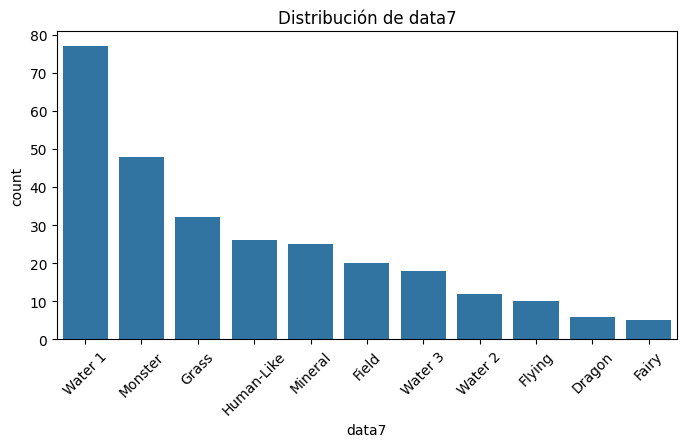


Distribución de 'data3':
data3
Paradox        22
Dragon          8
Mouse           8
Fox             7
Mushroom        6
               ..
Big Catfish     1
Jettison        1
Synchronize     1
Earthworm       1
Cobra           1
Name: count, Length: 715, dtype: int64


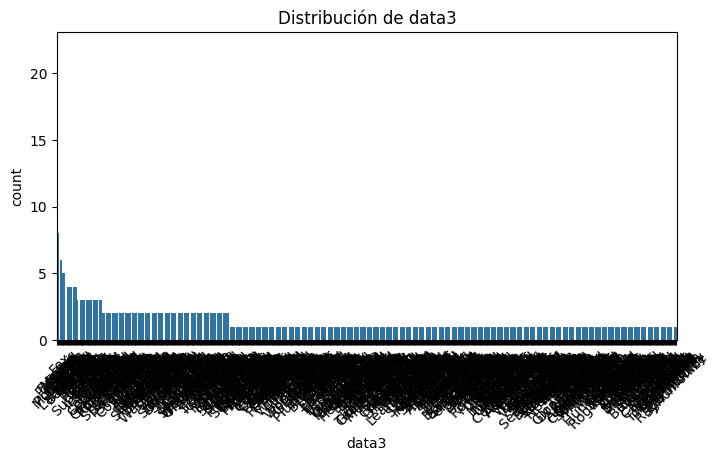


Distribución de 'data6.1':
data6.1
Field           182
Undiscovered    151
Field            76
Bug              72
Mineral          57
Dragon           54
Flying           50
Human-Like       42
Amorphous        40
Fairy            38
Grass            38
Amorphous        23
Fairy            23
Water 2          22
Water 3          19
Grass            19
Water 1          19
Bug              19
Water 1          18
Monster          18
Monster          15
Flying           13
Dragon           12
Mineral           2
Human-Like        2
Ditto             1
Name: count, dtype: int64


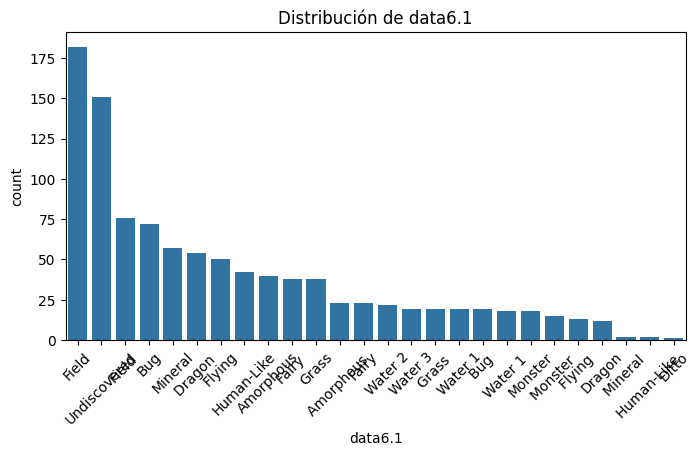


Distribución de 'special_group':
special_group
Ordinary           857
Legendary           70
Fossil              25
Mythical            23
Baby Pokemon        19
Ultra Beast         11
Ancient Paradox     10
Future Paradox      10
Name: count, dtype: int64


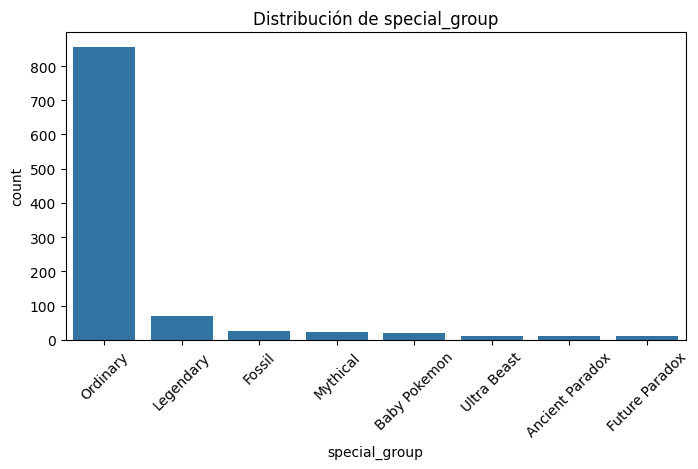


Distribución de 'data2':
data2
Flying      100
Psychic      42
Poison       41
Ground       35
Fairy        35
Fighting     33
Dragon       33
Ghost        30
Steel        29
Grass        24
Dark         24
Water        20
Ice          17
Rock         16
Fire         15
Normal       13
Electric     10
Bug           9
Name: count, dtype: int64


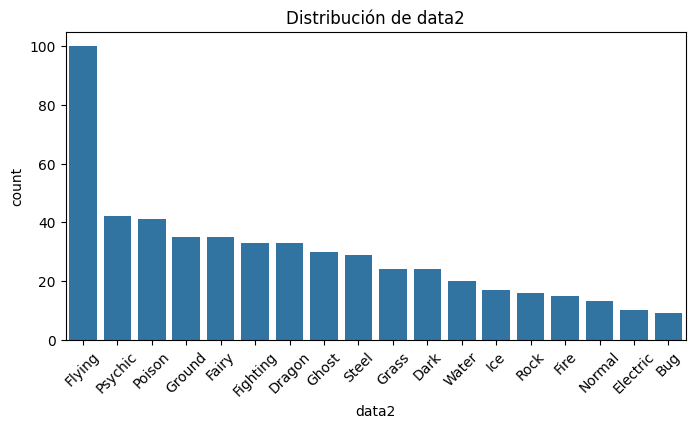


Distribución de 'data5':
data5
Shell Armor         20
Sturdy              18
Frisk               18
Infiltrator         17
Inner Focus         16
                    ..
Screen Cleaner       1
Slow Start           1
Armor Tail           1
Supreme Overlord     1
Embody Aspect        1
Name: count, Length: 169, dtype: int64


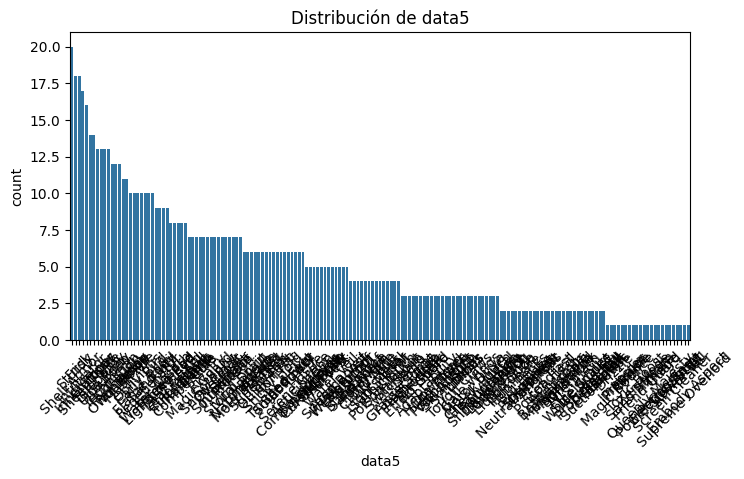


Distribución de 'base_exp':
base_exp
62     27
142    25
60     25
61     25
175    23
       ..
181     1
345     1
153     1
37      1
141     1
Name: count, Length: 181, dtype: int64


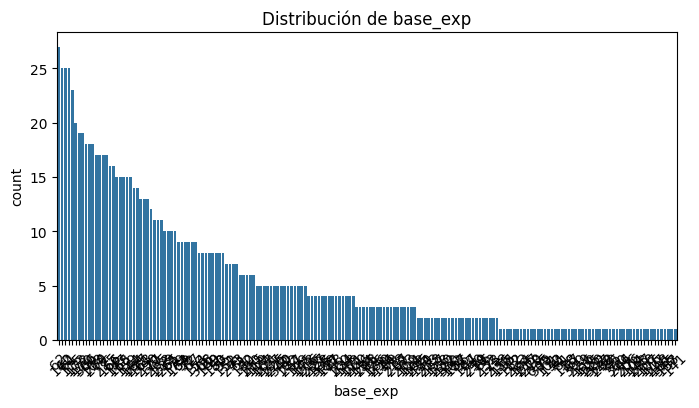


Distribución de 'ev_yield':
ev_yield
2 Attack                          108
1 Speed                            86
1 Attack                           86
2 Speed                            68
3 Attack                           62
2 Defense                          61
3 Sp. Atk                          57
2 Sp. Atk                          55
1 Defense                          54
2 HP                               47
1 HP                               47
1 Sp. Atk                          45
2 Sp. Def                          38
1 Sp. Def                          34
3 HP                               30
3 Speed                            22
3 Sp. Def                          21
3 Defense                          19
1 Defense, 1 Sp. Def               12
1 Attack, 1 Sp. Atk                10
1 Attack, 1 Defense                 7
1 Sp. Atk, 1 Speed                  7
1 Defense, 2 Sp. Def                5
1 Sp. Atk, 1 Sp. Def                4
2 Defense, 1 Sp. Def                3
2 Sp. Atk, 1

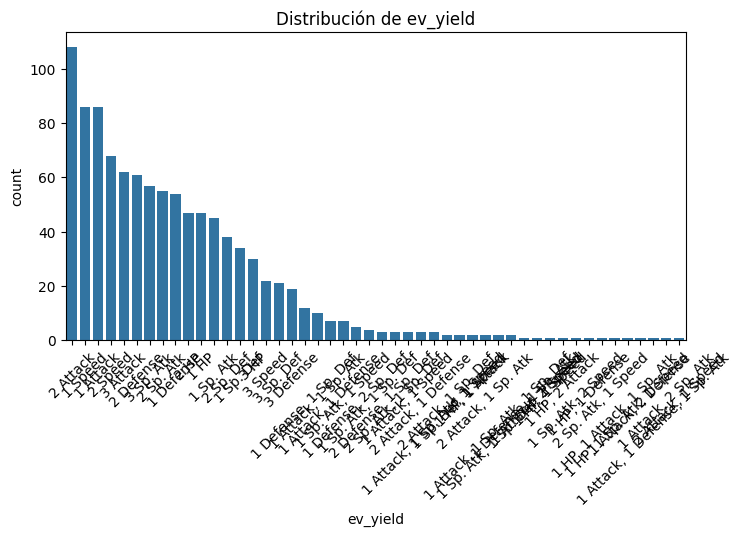


Distribución de 'data6.3':
data6.3
Field           182
Undiscovered    151
Field            76
Bug              72
Mineral          57
Dragon           54
Flying           50
Human-Like       42
Amorphous        40
Fairy            38
Grass            38
Amorphous        23
Fairy            23
Water 2          22
Water 3          19
Grass            19
Water 1          19
Bug              19
Water 1          18
Monster          18
Monster          15
Flying           13
Dragon           12
Mineral           2
Human-Like        2
Ditto             1
Name: count, dtype: int64


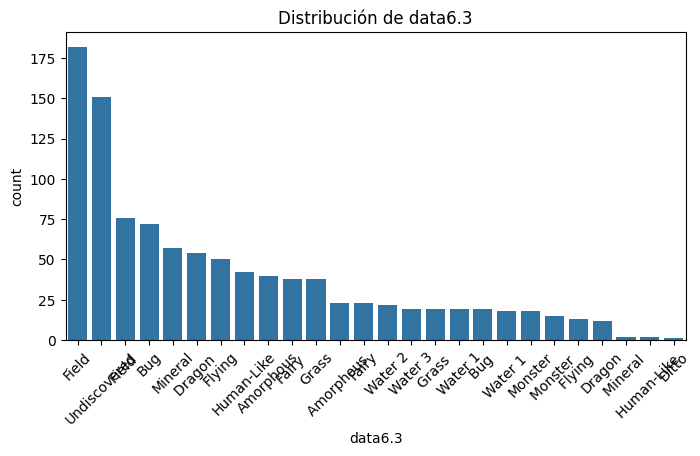


Distribución de 'data6.2':
data6.2
Weak Armor       15
Sheer Force      13
Unnerve          13
Regenerator      13
Analytic         12
                 ..
Symbiosis         1
Psychic Surge     1
Sharpness         1
Rocky Payload     1
Costar            1
Name: count, Length: 125, dtype: int64


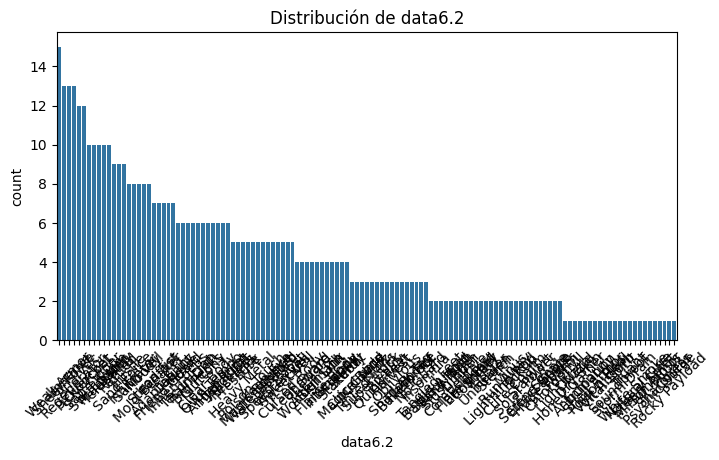


Distribución de 'growth_rate':
growth_rate
Medium Fast    401
Medium Slow    261
Slow           252
Fast            67
Erratic         30
Fluctuating     14
Name: count, dtype: int64


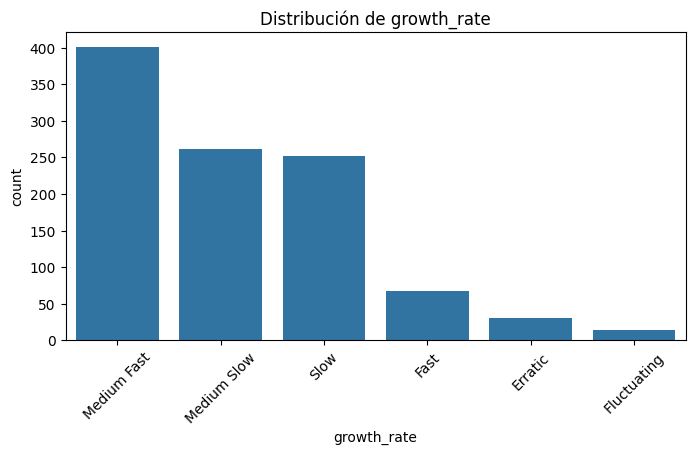


Distribución de 'data4':
data4
Levitate            32
Swift Swim          30
Overgrow            27
Chlorophyll         27
Torrent             27
                    ..
Hadron Engine        1
Orichalcum Pulse     1
Stamina              1
Tera Shift           1
Poison Puppeteer     1
Name: count, Length: 223, dtype: int64


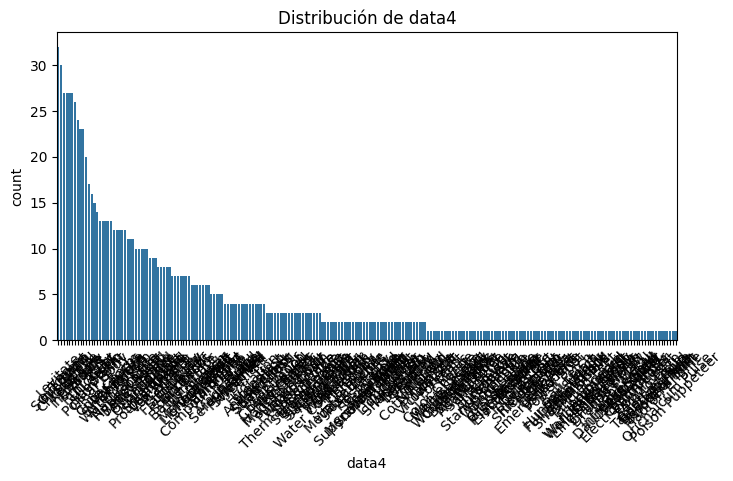


Distribución de 'base_friendship':
base_friendship
50     830
35      73
0       69
—       17
100     15
140     11
90       5
20       3
70       2
Name: count, dtype: int64


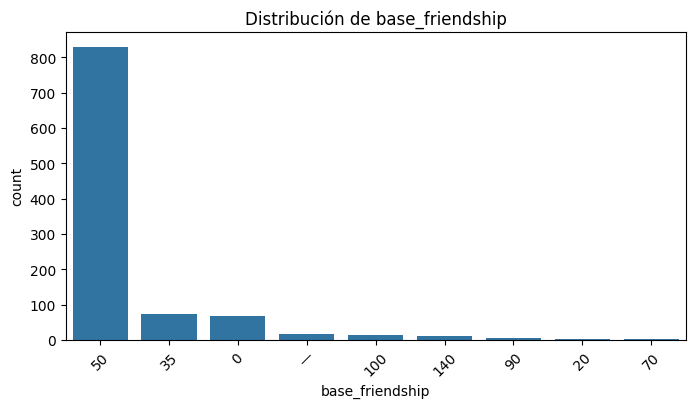


Distribución de 'egg_cycles':
egg_cycles
20     539
15     162
25      68
120     68
40      52
30      30
10      25
35      24
50      22
—       17
80      16
5        2
Name: count, dtype: int64


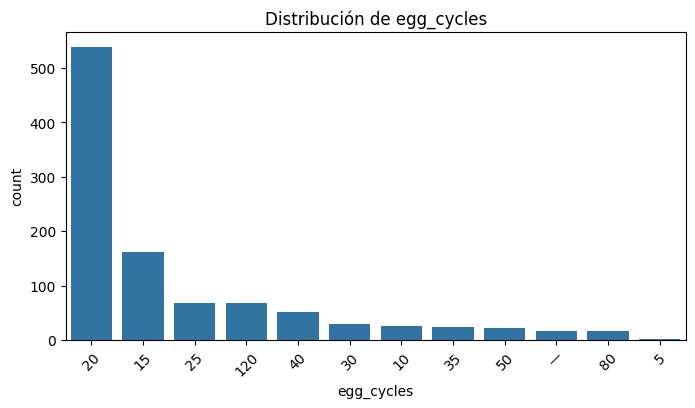


Distribución de 'data1':
data1
Water       134
Normal      118
Grass       103
Bug          83
Fire         66
Psychic      60
Electric     59
Rock         58
Dark         45
Poison       42
Ground       40
Fighting     40
Dragon       37
Steel        36
Ghost        35
Ice          31
Fairy        29
Flying        9
Name: count, dtype: int64


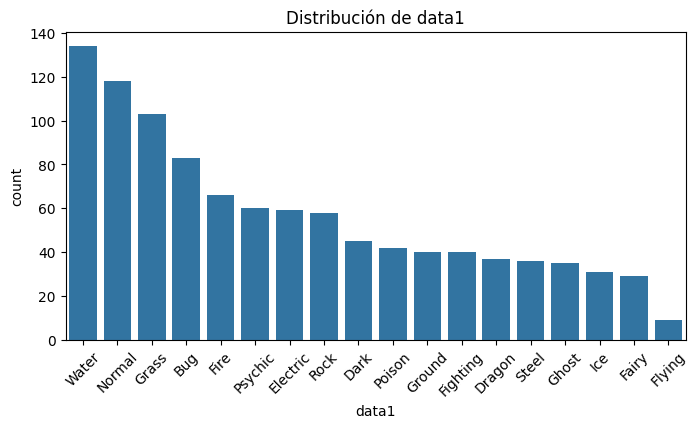


Distribución de 'data6':
data6
Weak Armor       15
Sheer Force      13
Unnerve          13
Regenerator      13
Analytic         12
                 ..
Symbiosis         1
Psychic Surge     1
Sharpness         1
Rocky Payload     1
Costar            1
Name: count, Length: 125, dtype: int64


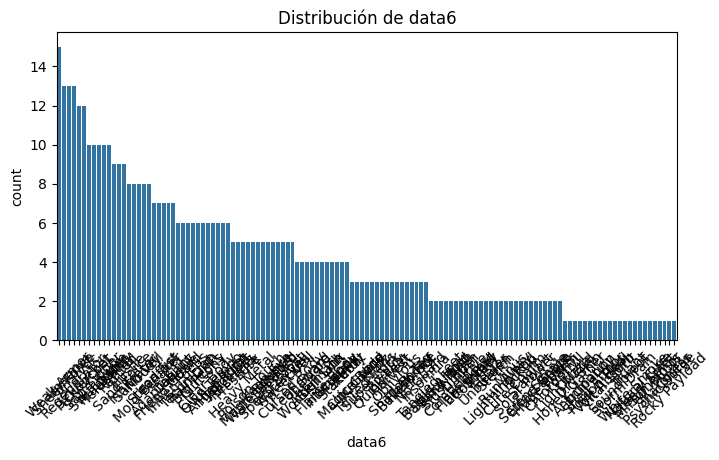

In [9]:
# Identificar columnas categóricas
categorical_cols = df.select_dtypes(include='object').columns
print("Columnas categóricas:", categorical_cols)

# Conteo de valores únicos por columna categórica
for col in categorical_cols:
    print(f"\nDistribución de '{col}':")
    print(df[col].value_counts())

    # Gráfico de barras
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Distribución de {col}")
    plt.xticks(rotation=45)
    plt.show()

## 4. Análisis de variables numéricas

Vamos a examinar la distribución de las variables numéricas usando histogramas y boxplots.

Columnas numéricas: Index(['catch_rate', 'height', 'defense', 'sp_atk', 'sp_def', 'dexnum',
       'percent_female', 'hp', 'generation', 'speed', 'weight', 'total',
       'attack', 'percent_male'],
      dtype='object')


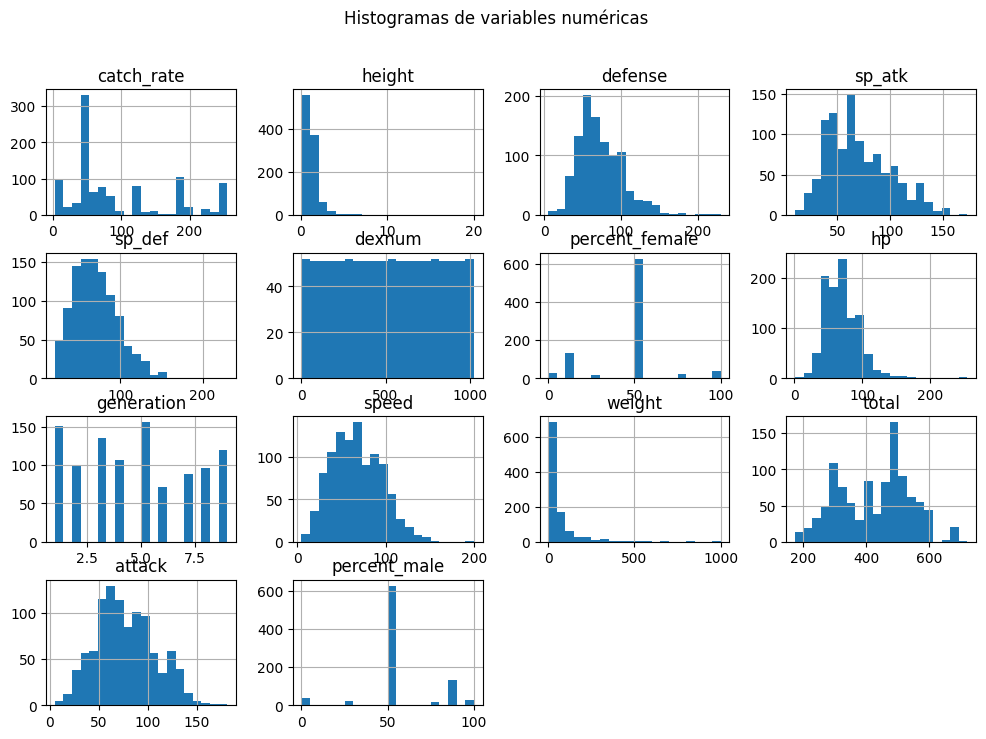

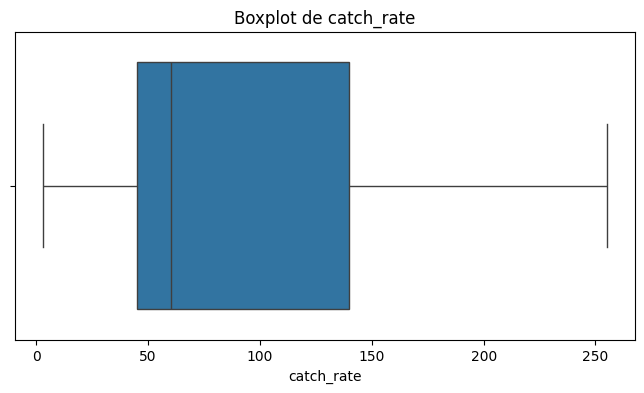

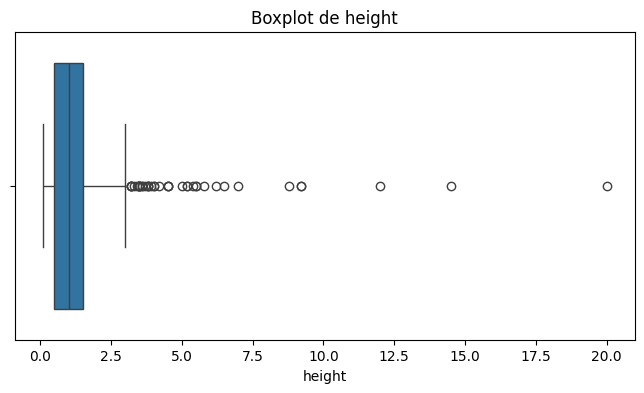

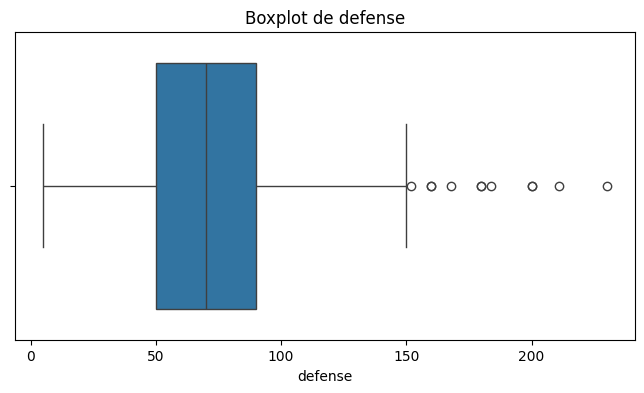

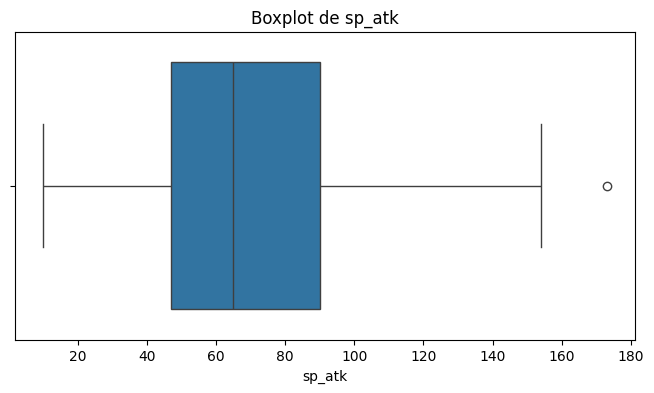

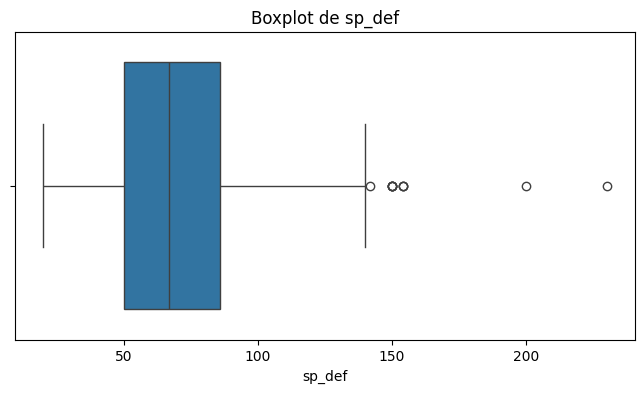

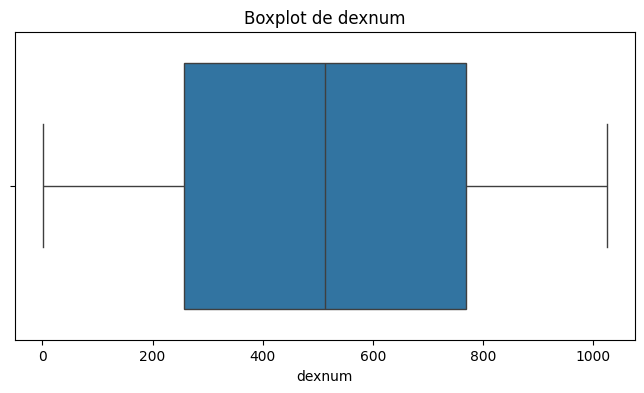

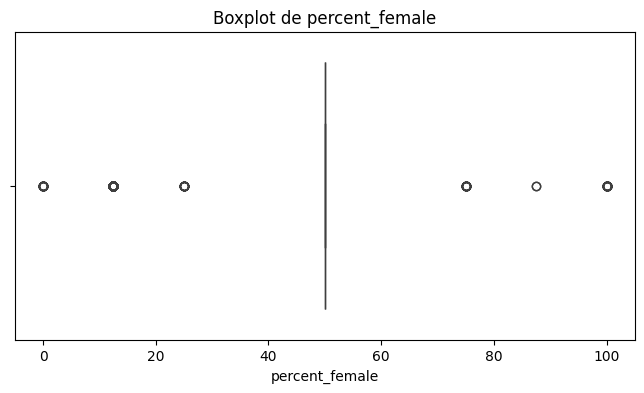

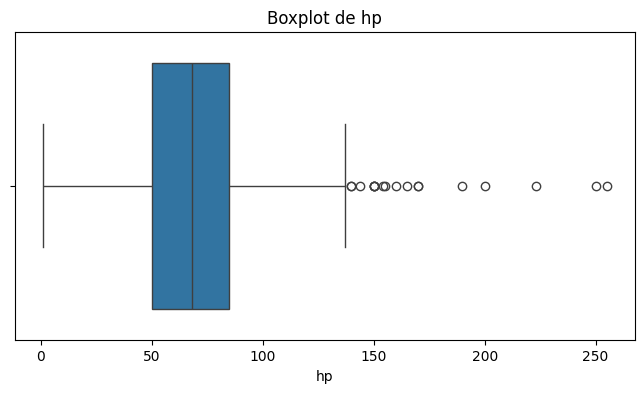

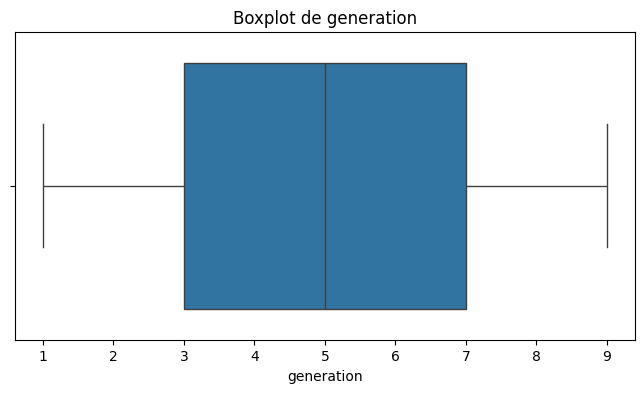

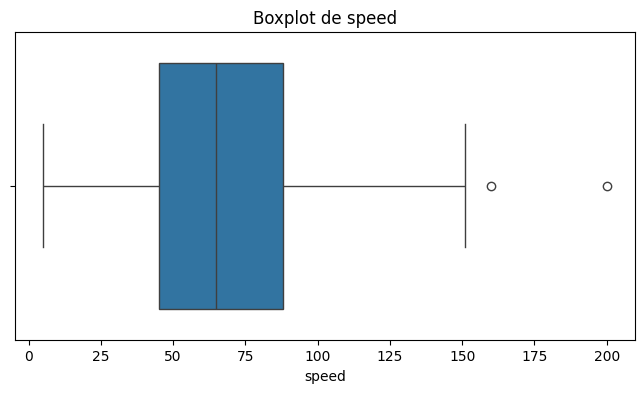

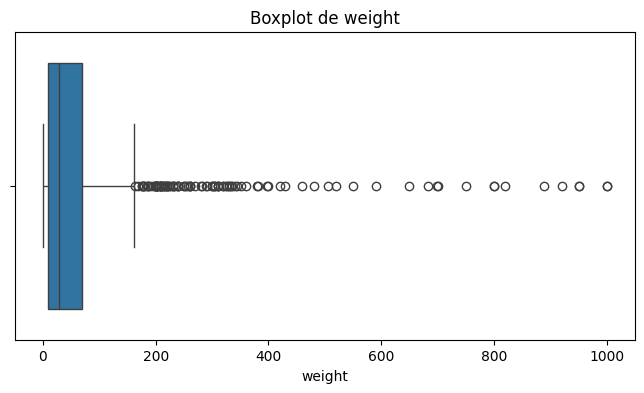

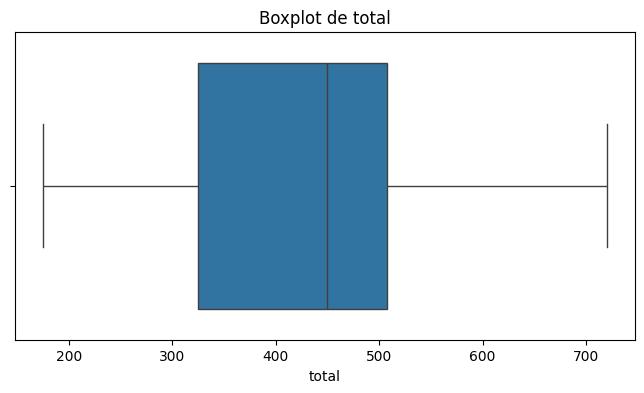

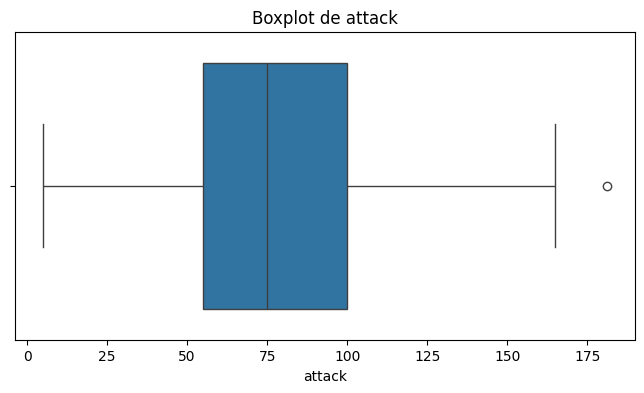

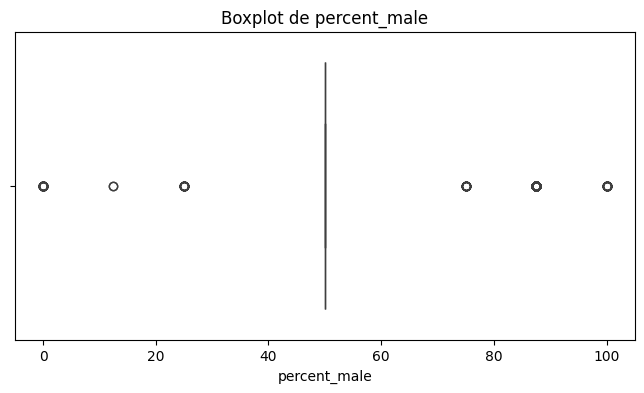

In [11]:
# Columnas numéricas
numeric_cols = df.select_dtypes(include=np.number).columns
print("Columnas numéricas:", numeric_cols)

# Histogramas
df[numeric_cols].hist(figsize=(12,8), bins=20)
plt.suptitle("Histogramas de variables numéricas")
plt.show()

# Boxplots
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
    plt.show()

## 5. Correlaciones

Analicemos cómo se relacionan las variables numéricas entre sí.

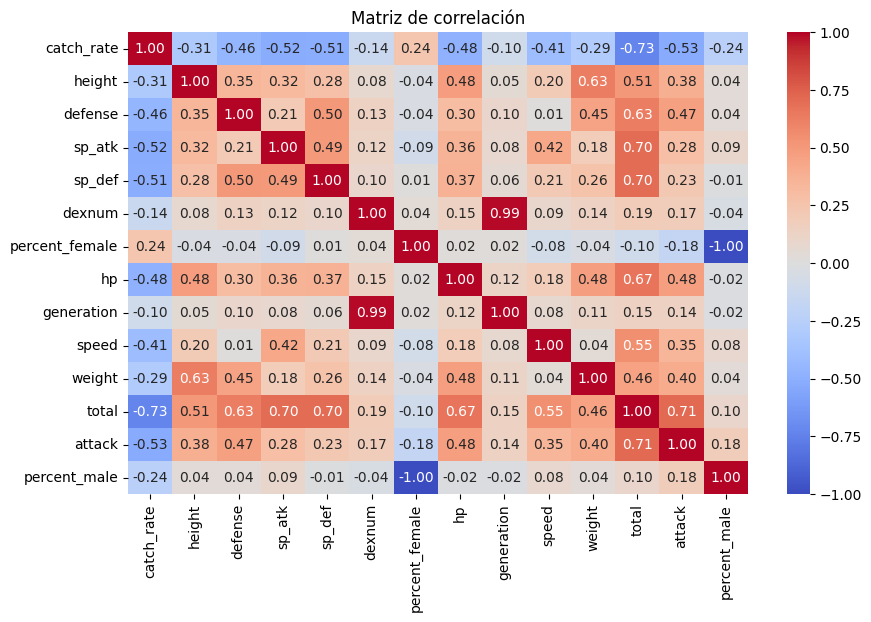

In [13]:
# Matriz de correlación
corr = df[numeric_cols].corr()

# Mapa de calor
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

## 6. Análisis bivariado

Vamos a explorar relaciones entre variables numéricas y categóricas.  
Por ejemplo, podemos usar boxplots para ver cómo varía una variable numérica según categorías.

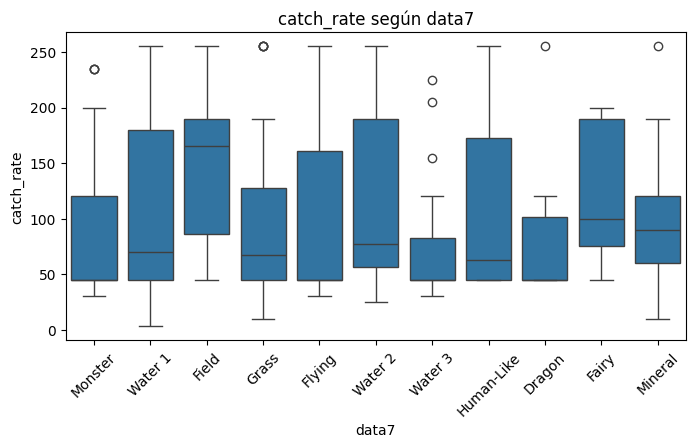

In [15]:
# Seleccionamos una variable categórica y una numérica para el ejemplo
if len(categorical_cols) > 0 and len(numeric_cols) > 0:
    cat_col = categorical_cols[0]
    num_col = numeric_cols[0]

    plt.figure(figsize=(8,4))
    sns.boxplot(x=cat_col, y=num_col, data=df)
    plt.title(f"{num_col} según {cat_col}")
    plt.xticks(rotation=45)
    plt.show()

## 7. Ejercicios de práctica

1. Identifica la columna con más valores faltantes y decide cómo tratarla (eliminar, rellenar, etc.).
2. Encuentra la variable numérica con mayor desviación estándar y explora su distribución.
3. Elige otra variable categórica y realiza un análisis bivariado con alguna variable numérica.
4. Identifica posibles outliers usando los boxplots y decide si los mantienes o los transformas.
5. Resume tus hallazgos en un breve párrafo.

In [18]:
## Find column name with more null and the number too 
null_per_col = df.isna().sum()
col_top = null_per_col.idxmax()
n_top = null_per_col.max()
print(col_top, n_top)

data7 746


In [19]:
## All columns sorted by nulls
null_per_col.sort_values(ascending=False)

data7              746
data2              499
data6              495
data6.2            495
data5              167
percent_female     155
percent_male       155
defense              0
data3                0
sp_atk               0
special_group        0
data6.1              0
height               0
catch_rate           0
hp                   0
sp_def               0
dexnum               0
generation           0
weight               0
total                0
speed                0
base_exp             0
data6.3              0
ev_yield             0
growth_rate          0
data4                0
attack               0
base_friendship      0
data1                0
egg_cycles           0
dtype: int64

In [21]:
## Percentage of nulls
pct_nulls = df.isna().mean().sort_values(ascending=False)
(pct_nulls * 100).round(2)

data7              72.78
data2              48.68
data6              48.29
data6.2            48.29
data5              16.29
percent_female     15.12
percent_male       15.12
defense             0.00
data3               0.00
sp_atk              0.00
special_group       0.00
data6.1             0.00
height              0.00
catch_rate          0.00
hp                  0.00
sp_def              0.00
dexnum              0.00
generation          0.00
weight              0.00
total               0.00
speed               0.00
base_exp            0.00
data6.3             0.00
ev_yield            0.00
growth_rate         0.00
data4               0.00
attack              0.00
base_friendship     0.00
data1               0.00
egg_cycles          0.00
dtype: float64

In [25]:
## Summary table 
summary_null = (pd.DataFrame({
    "nulls" : df.isna().sum(),
    "pct_nulls": df.isna().mean().mul(100).round(2)
})
.sort_values("nulls", ascending=False))
print(summary_null.head())

         nulls  pct_nulls
data7      746      72.78
data2      499      48.68
data6      495      48.29
data6.2    495      48.29
data5      167      16.29


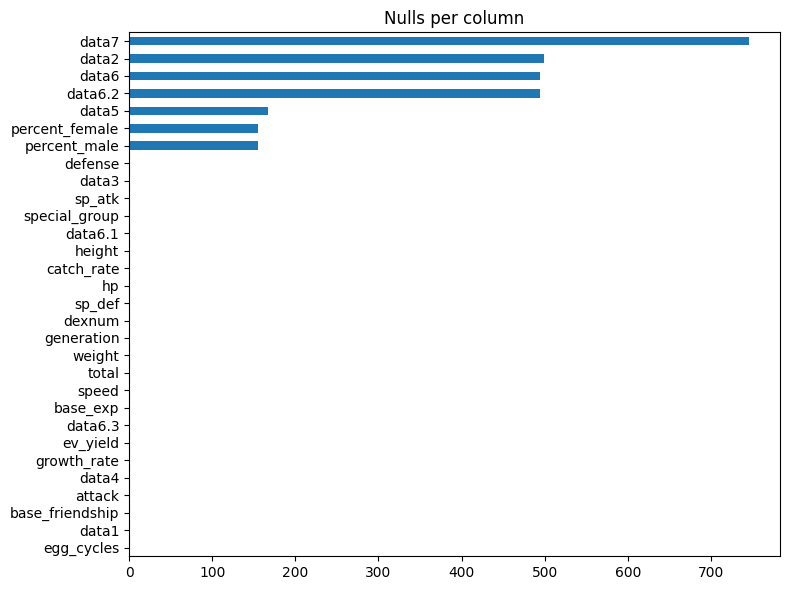

In [28]:
## Visualization
import matplotlib.pyplot as plt
summary_null["nulls"].plot(kind="barh", figsize=(8, 6))
plt.gca().invert_yaxis()
plt.title("Nulls per column")
plt.tight_layout()
plt.show()